In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


turning data into [0,1]

In [17]:
train.iloc[:, 1:] = train.iloc[:, 1:] / 255

In [18]:
train.shape

(42000, 785)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, 1:], train['label'], train_size=0.9)

In [20]:
X_train.shape

(37800, 784)

reshaping data to 28x28

In [23]:
X_train = X_train.values.reshape(-1,28,28,1)
X_val = X_val.values.reshape(-1,28,28,1)

one-hot encoding of labels

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

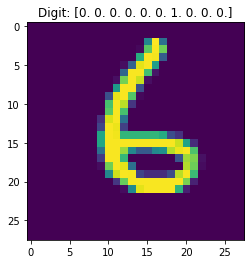

In [32]:
plt.imshow(X_train[5].reshape(28, 28))# (rows, columns)

plt.title(f"Digit: {y_train[5]}")
plt.show() 

In [48]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [49]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                 

In [50]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
from keras.preprocessing.image import ImageDataGenerator

data_augm = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


data_augm.fit(X_train)

In [54]:
model.fit(data_augm.flow(X_train, y_train), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1182/1182 [==============================] - 23s 19ms/step - loss: 0.3077 - accuracy: 0.8999 - val_loss: 0.0591 - val_accuracy: 0.9817
Epoch 2/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.1022 - accuracy: 0.9689 - val_loss: 0.0562 - val_accuracy: 0.9812
Epoch 3/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0777 - accuracy: 0.9763 - val_loss: 0.0658 - val_accuracy: 0.9795
Epoch 4/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0710 - val_accuracy: 0.9810
Epoch 5/10
1182/1182 [==============================] - 23s 20ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 6/10
1182/1182 [==============================] - 24s 21ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.0450 - val_accuracy: 0.9852
Epoch 7/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.0512 -

### test set

In [55]:
test = pd.read_csv("data/test.csv")

In [56]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test = test / 255

In [60]:
test = np.array(test).reshape(-1,28,28,1)

In [66]:
results = model.predict(test)

results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

In [67]:
len(results)

28000

In [71]:
submission = pd.concat([pd.Series(range(1, len(results)+1), name="ImageID"),
                       results], axis=1)
submission.to_csv("submission.csv", index=False)